In [6]:
from google.colab import drive
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#estos son parametros para los gráficos, son modificables global y localmente
plt.rcParams.update({'legend.fontsize': 22})
plt.rcParams.update({'axes.titlesize': 22})
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'legend.loc':"best"})
plt.rcParams.update({"figure.figsize": [9, 7]})
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'STIXGeneral'

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


#Señales

In [8]:
voltaje = []
tiempo = []

for i in range(1,6):

    path = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 3-9/cobre/en cero/{i}.csv"
    df= pd.read_csv(path, header=None, skiprows= 1)
    t = df[0]
    v = df[2]

    inicio = []

    for n in range(len(v)-1):
        if v[n] >= 0.1:
            inicio.append(n)
            break

    tiempo.append(t[inicio[0]:]-t[inicio[0]])
    voltaje.append(v[inicio[0]:])
    print(inicio)




[2632]
[3298]
[2479]
[2548]
[3587]


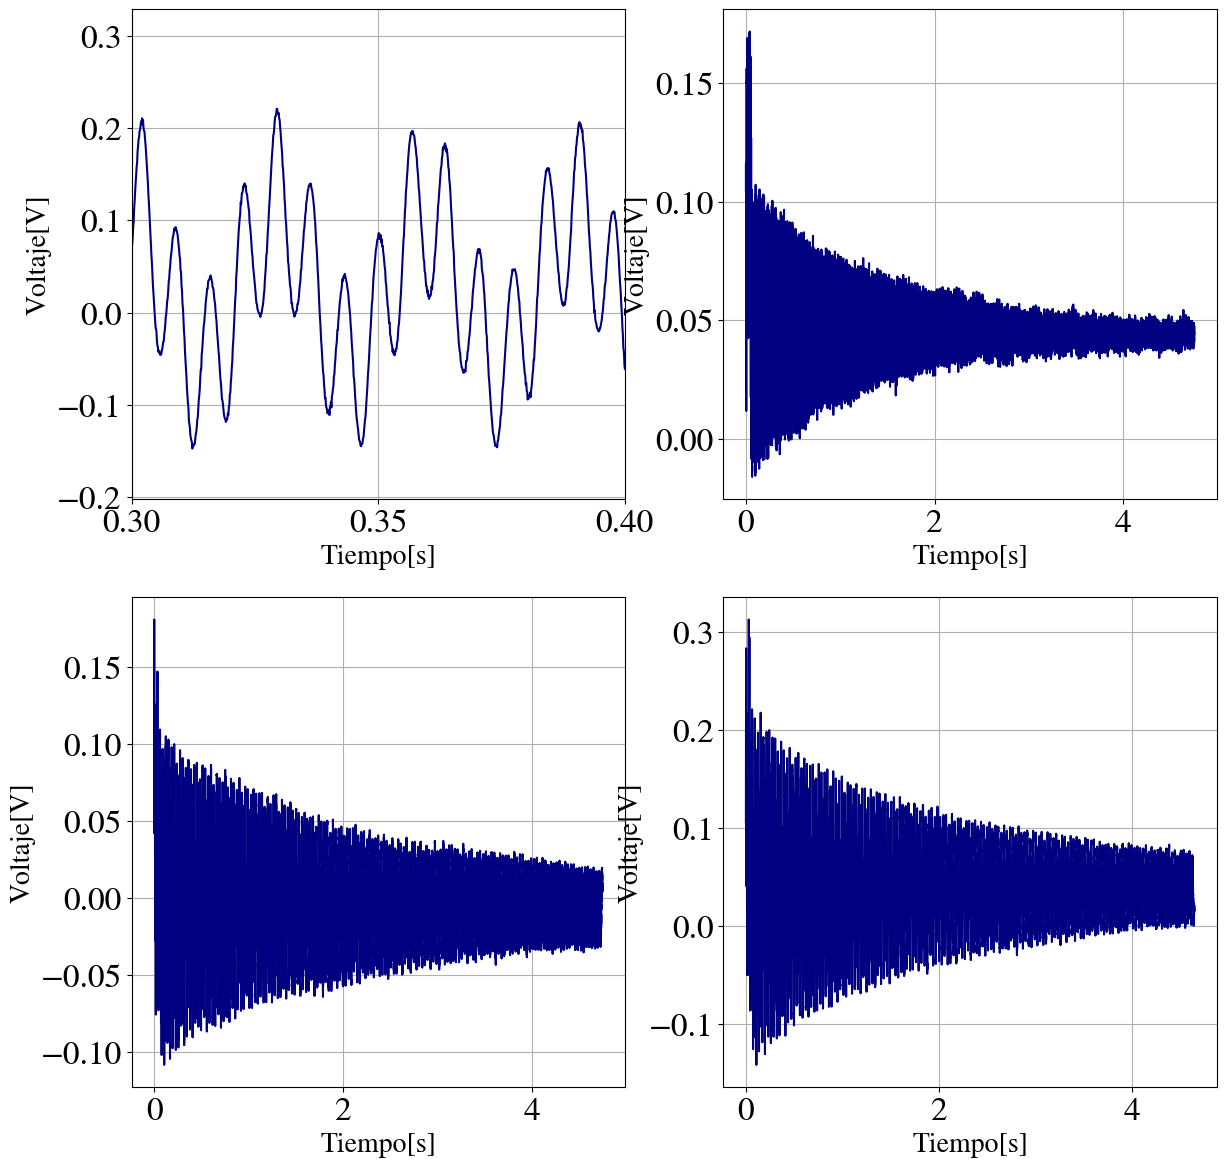

In [9]:
fig, axs = plt.subplots(2,2, figsize= (14,14))
axs[0,0].plot(tiempo[1], voltaje[1], color = 'navy', label = 'Señal')
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].set_xlim(0.3,0.4)
#axs[0,0].legend()

axs[0,1].plot(tiempo[2], voltaje[2], color = 'navy', label = 'Señal')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
#axs[0,1].legend()

axs[1,0].plot(tiempo[3], voltaje[3], color = 'navy', label = 'Señal')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
#axs[1,0].legend()

axs[1,1].plot(tiempo[4], voltaje[4], color = 'navy', label = 'Señal')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
#axs[1,1].legend()

plt.show()

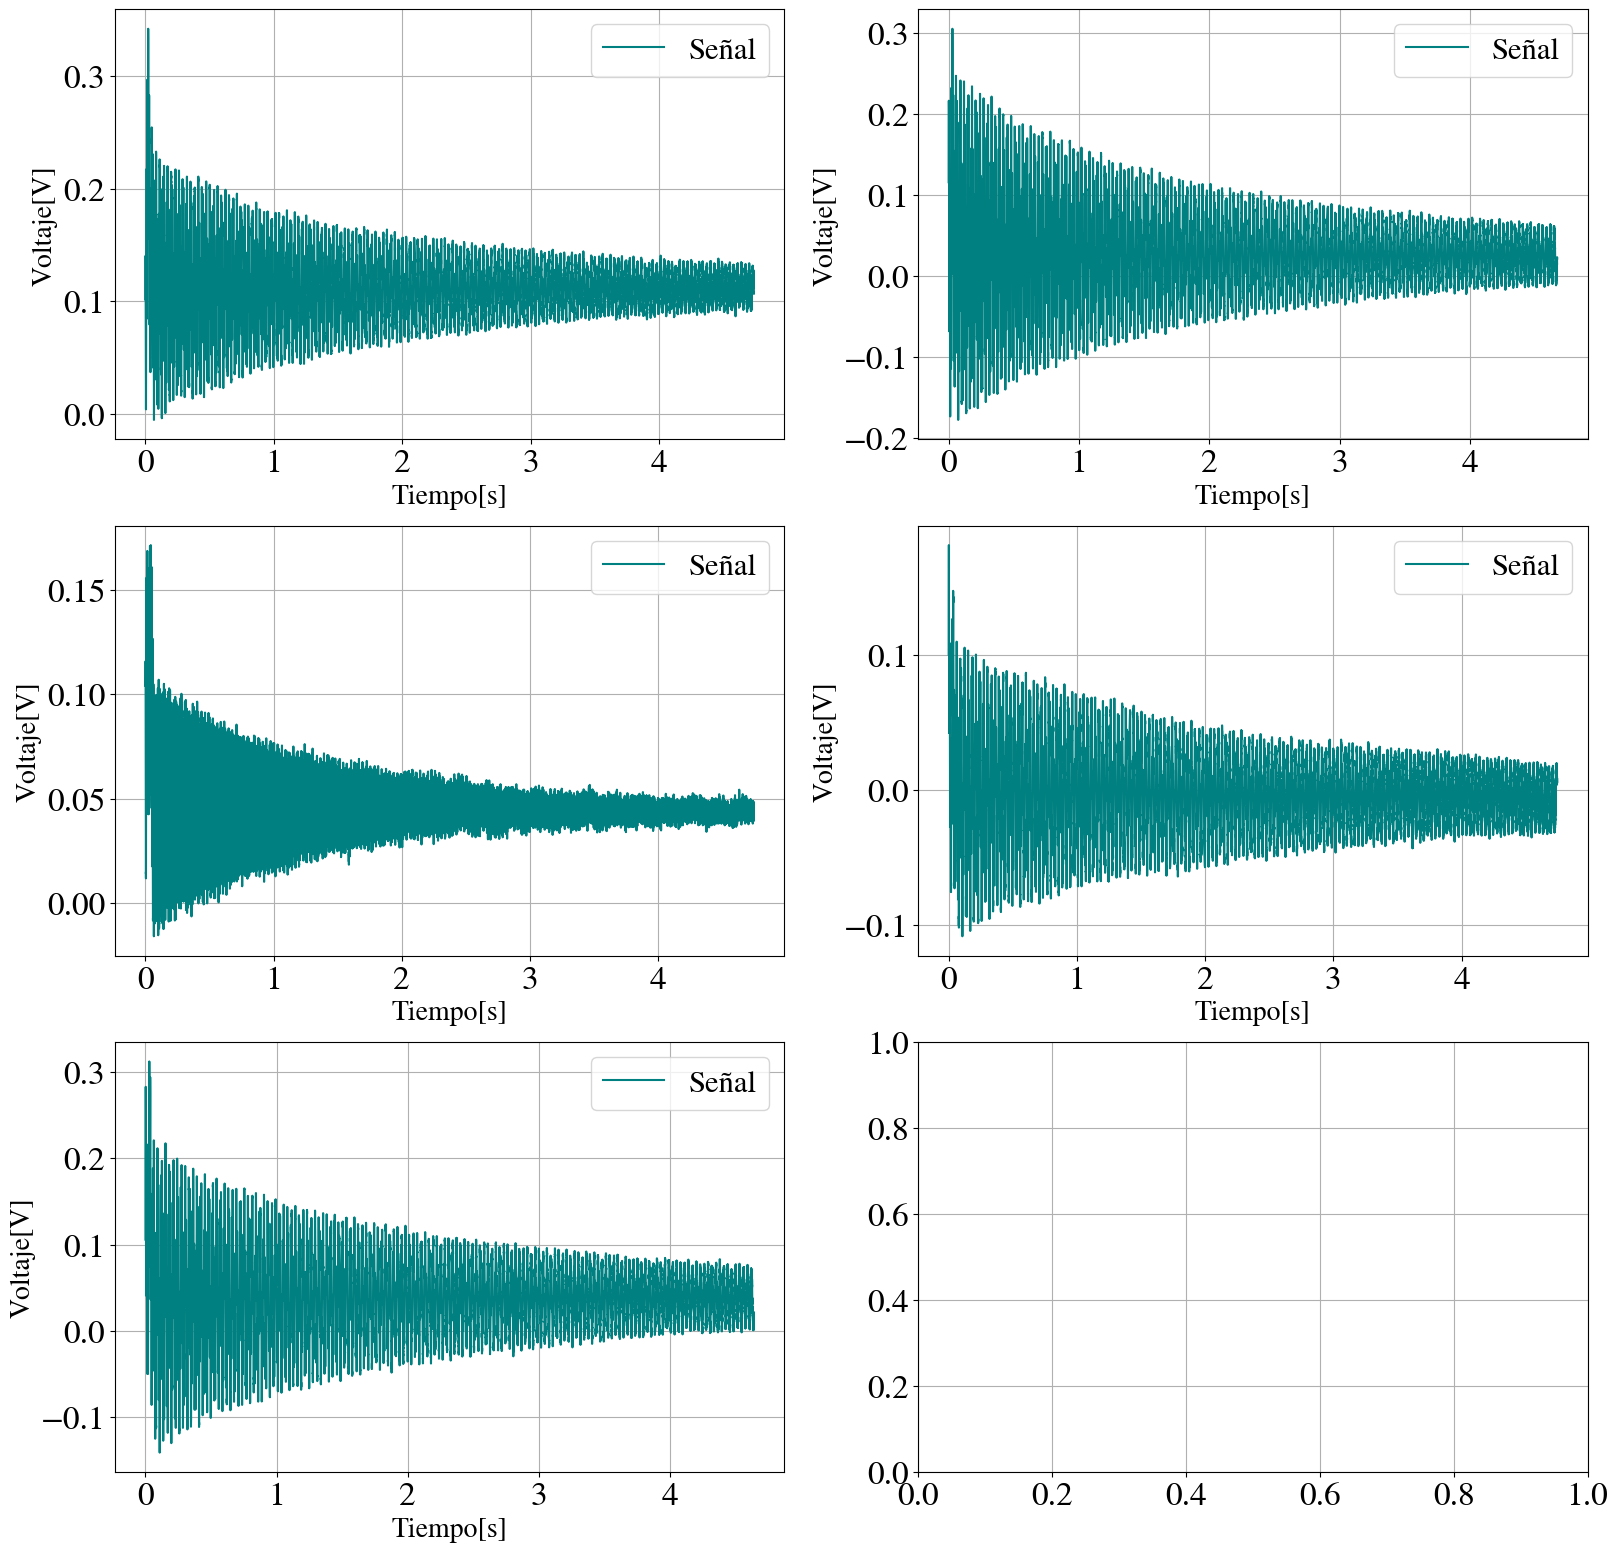

In [36]:
#Grafico todo junto

fig, axs = plt.subplots(3,2, figsize= (19,19))
axs[0,0].plot(tiempo[0], voltaje[0], color = 'teal', label = 'Señal')
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].legend()


axs[0,1].plot(tiempo[1], voltaje[1], color = 'teal', label = 'Señal')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
axs[0,1].legend()

axs[1,0].plot(tiempo[2], voltaje[2], color = 'teal', label = 'Señal')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
axs[1,0].legend()

axs[1,1].plot(tiempo[3], voltaje[3], color = 'teal', label = 'Señal')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
axs[1,1].legend()

axs[2,0].plot(tiempo[4], voltaje[4], color = 'teal', label = 'Señal')
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Tiempo[s]')
axs[2,0].legend()

plt.show()

#FFT

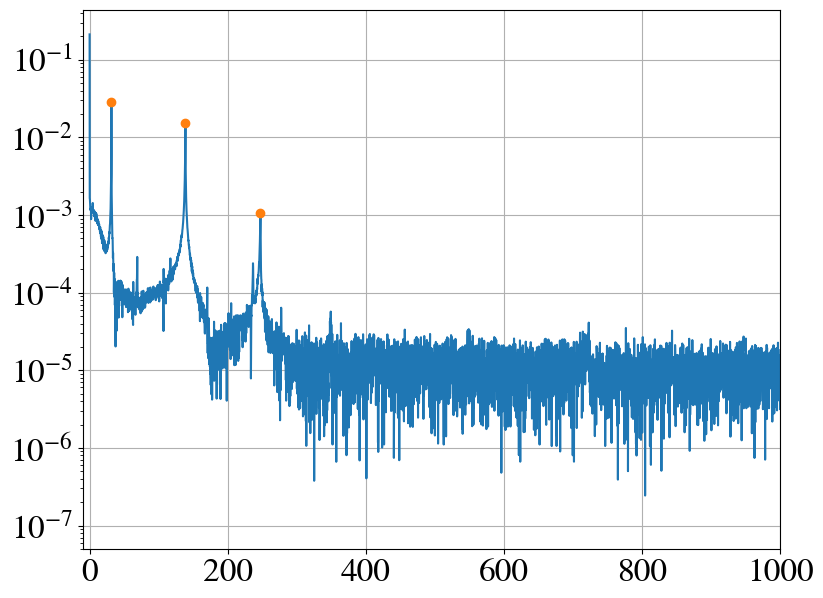

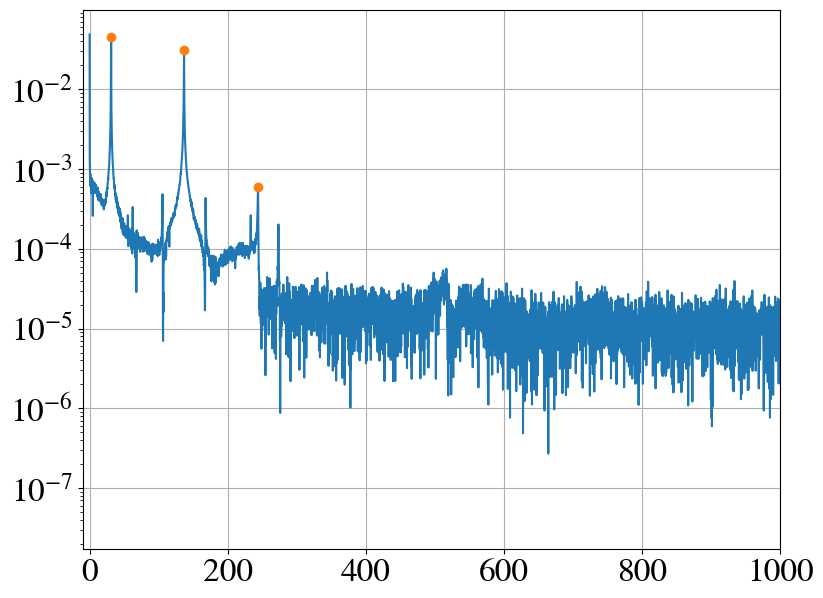

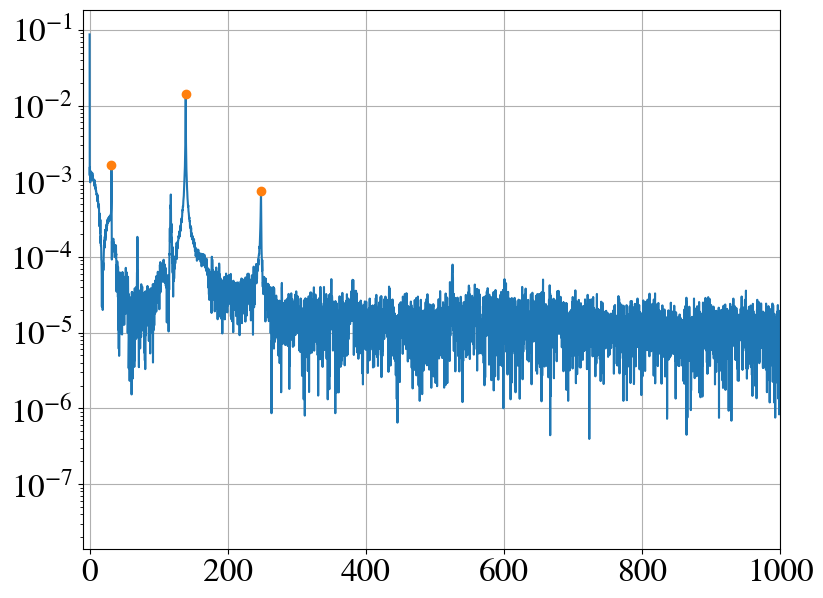

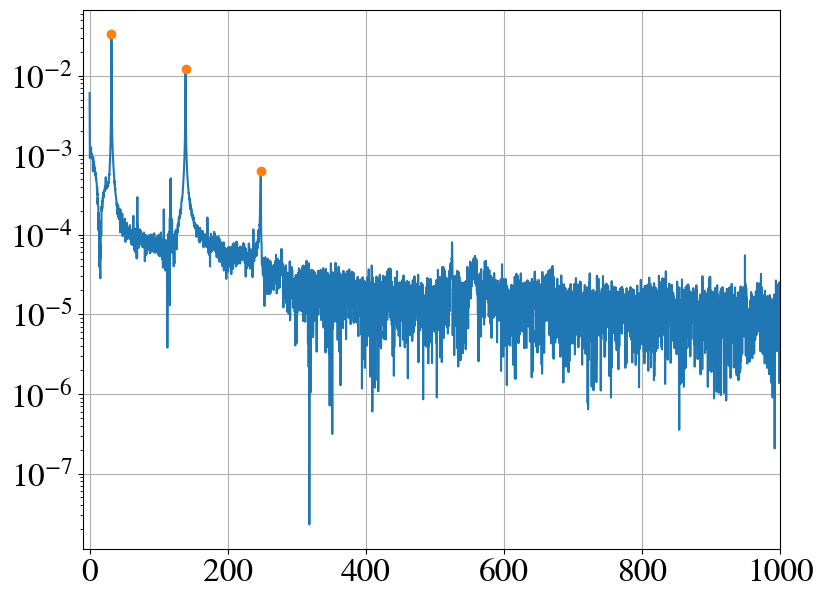

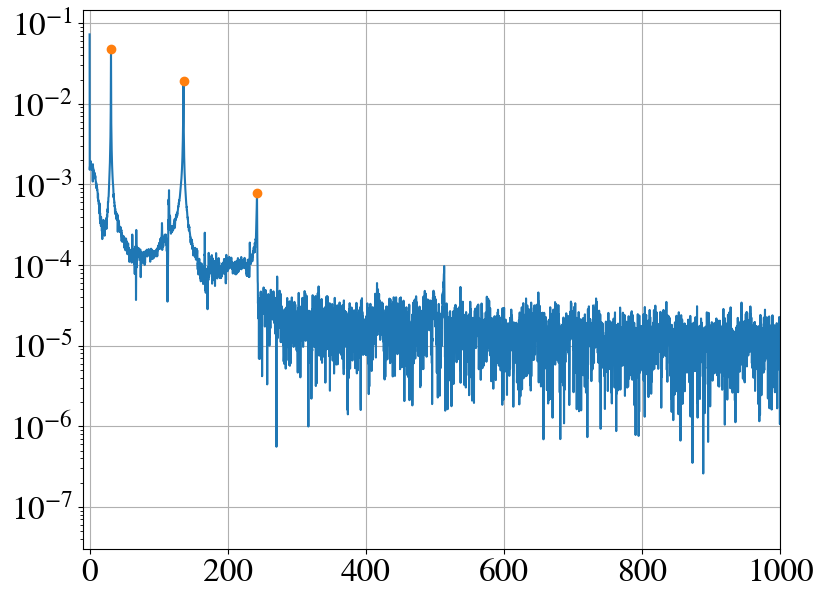

In [11]:
#calculo las tranformadas

N = 50000
frec_muestreo = 10000

# Calular el vector de frecuencias.
frec = np.arange(0,frec_muestreo,1/5)

fft = []
picos = []
frec_picos = []

for i in range(5):
    fft1 = np.fft.fft(voltaje[i])
    fft2 = 2.0/N * np.abs(fft1)
    picos1, diccionario = find_peaks(fft2, threshold = 0.000005, distance = 500, height= 0.0005)

    plt.plot(frec[:N//2], fft2[:N//2])
    plt.plot(frec[picos1], fft2[picos1], marker = 'o', linestyle = '')
    plt.yscale('log')
    plt.xlim(-10,1000)
    plt.show()

    fft.append(fft2)
    picos.append(picos1)
    frec_picos.append(frec[picos1][:3])


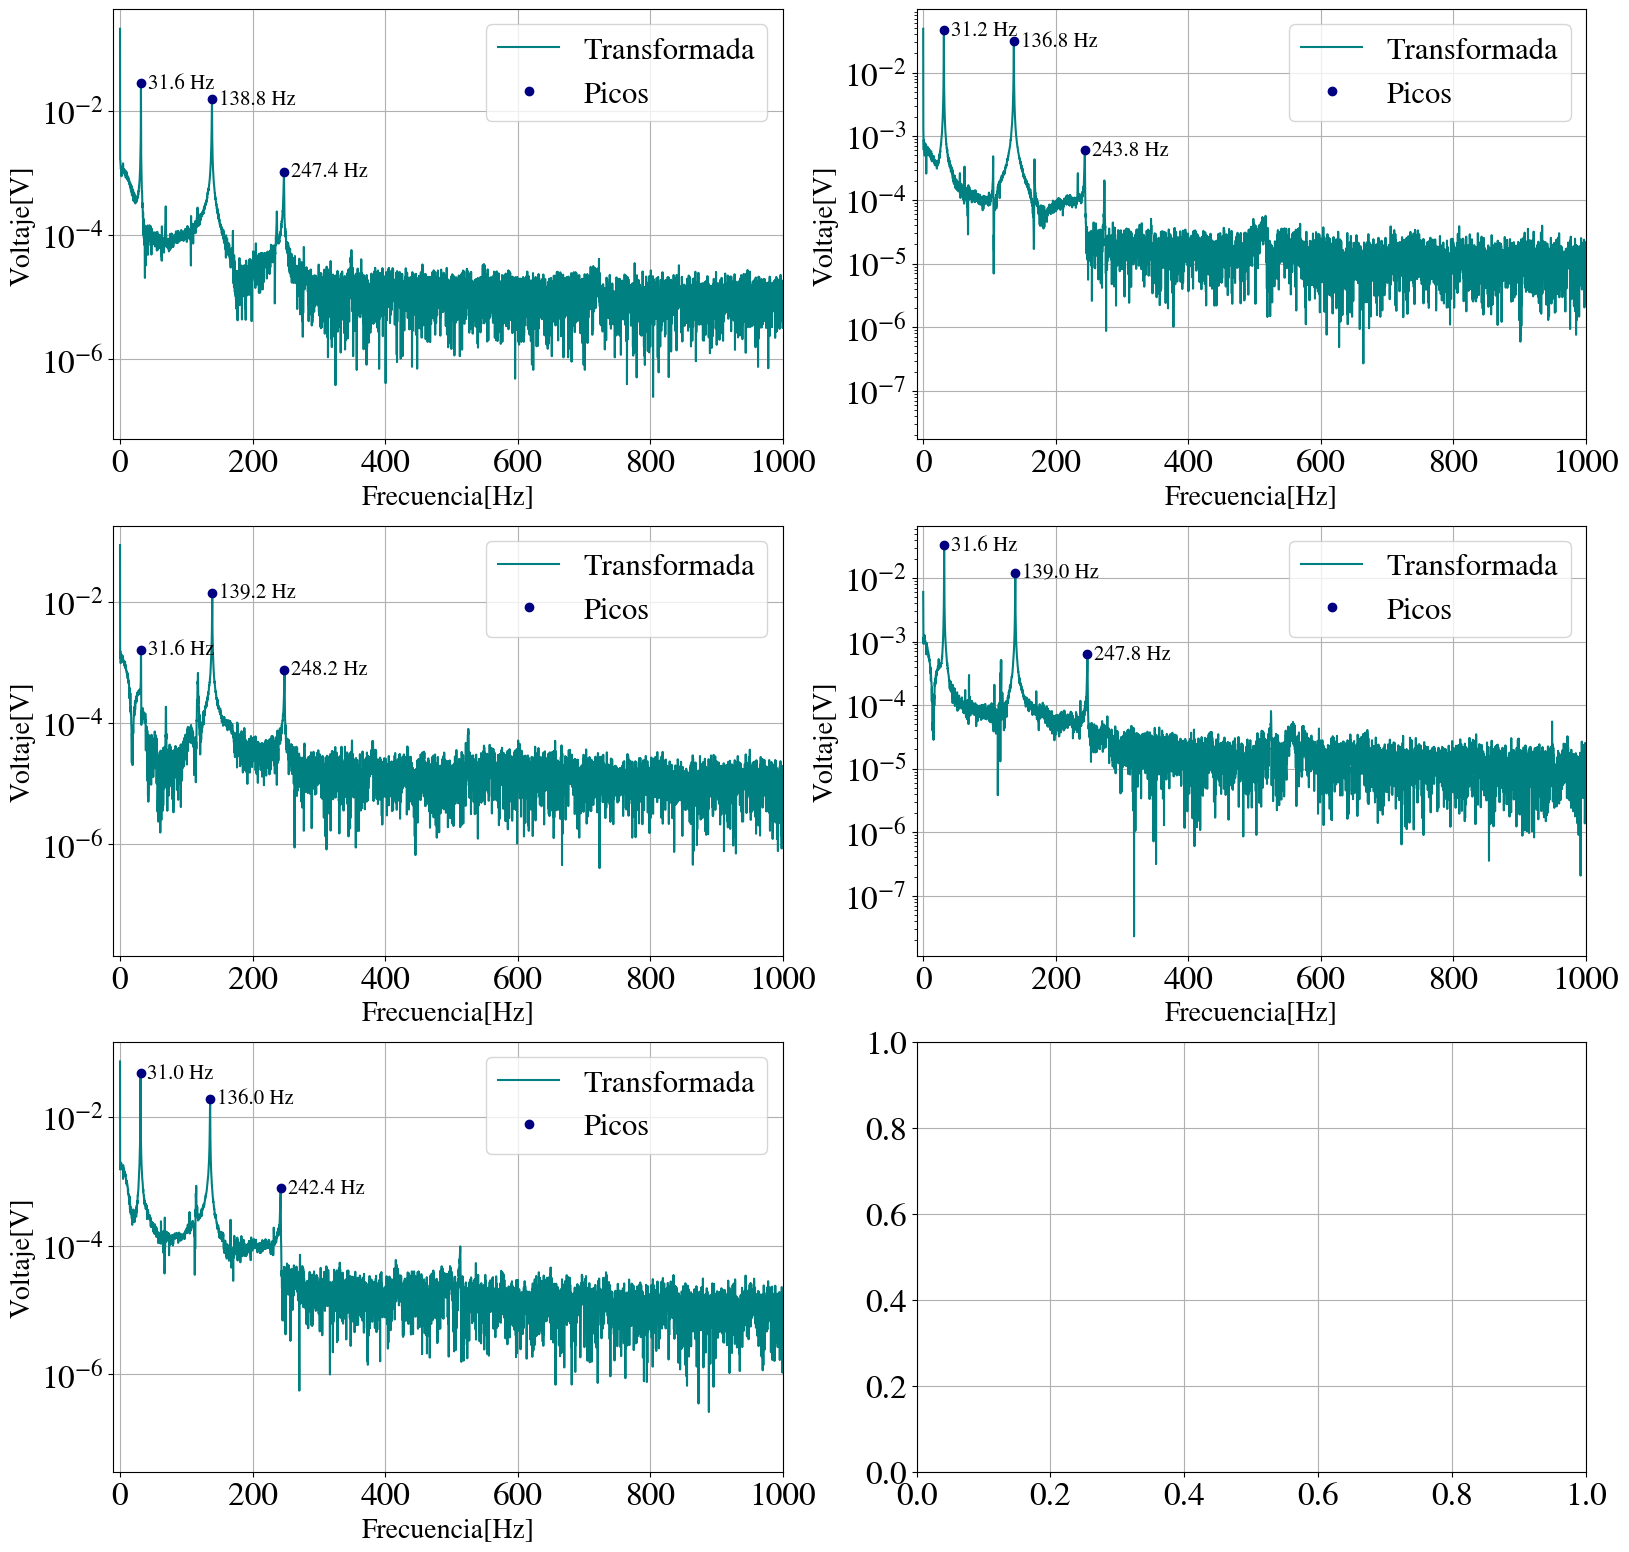

In [35]:
#Grafico todo junto

fig, axs = plt.subplots(3,2, figsize= (19,19))
axs[0,0].plot(frec[:N//2], fft[0][:N//2], color = 'teal', label = 'Transformada')
axs[0,0].plot(frec[picos[0]], fft[0][picos[0]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Frecuencia[Hz]')
axs[0,0].set_xlim(-10,1000)
axs[0,0].set_yscale('log')
axs[0,0].legend()
for f, a in zip(frec[picos[0]], fft[0][picos[0]]):
    axs[0,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)


axs[0,1].plot(frec[:N//2], fft[1][:N//2], color = 'teal', label = 'Transformada')
axs[0,1].plot(frec[picos[1]], fft[1][picos[1]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Frecuencia[Hz]')
axs[0,1].set_xlim(-10,1000)
axs[0,1].set_yscale('log')
axs[0,1].legend()
for f, a in zip(frec[picos[1]], fft[1][picos[1]]):
    axs[0,1].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1,0].plot(frec[:N//2], fft[2][:N//2], color = 'teal', label = 'Transformada')
axs[1,0].plot(frec[picos[2]], fft[2][picos[2]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Frecuencia[Hz]')
axs[1,0].set_xlim(-10,1000)
axs[1,0].set_yscale('log')
axs[1,0].legend()
for f, a in zip(frec[picos[2]], fft[2][picos[2]]):
    axs[1,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1,1].plot(frec[:N//2], fft[3][:N//2], color = 'teal', label = 'Transformada')
axs[1,1].plot(frec[picos[3]], fft[3][picos[3]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Frecuencia[Hz]')
axs[1,1].set_xlim(-10,1000)
axs[1,1].set_yscale('log')
axs[1,1].legend()
for f, a in zip(frec[picos[3]], fft[3][picos[3]]):
    axs[1,1].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[2,0].plot(frec[:N//2], fft[4][:N//2], color = 'teal', label = 'Transformada')
axs[2,0].plot(frec[picos[4]], fft[4][picos[4]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Frecuencia[Hz]')
axs[2,0].set_xlim(-10,1000)
axs[2,0].set_yscale('log')
axs[2,0].legend()
for f, a in zip(frec[picos[4]], fft[4][picos[4]]):
    axs[2,0].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

plt.show()

In [13]:
print(frec_picos)

[array([ 31.6, 138.8, 247.4]), array([ 31.2, 136.8, 243.8]), array([ 31.6, 139.2, 248.2]), array([ 31.6, 139. , 247.8]), array([ 31. , 136. , 242.4])]


In [14]:
32*((4.694091/1.875104)**2)

200.54058016019414

In [15]:
32*8

256

# Decaimiento

In [16]:
def exponencial(x,a,b,c,d):
    return a*np.exp((x-c)*b)+d

def exp_neg(x,a,b,c,d):
    return -a*np.exp(-(x-c)*b)+d

-0.63010067863485


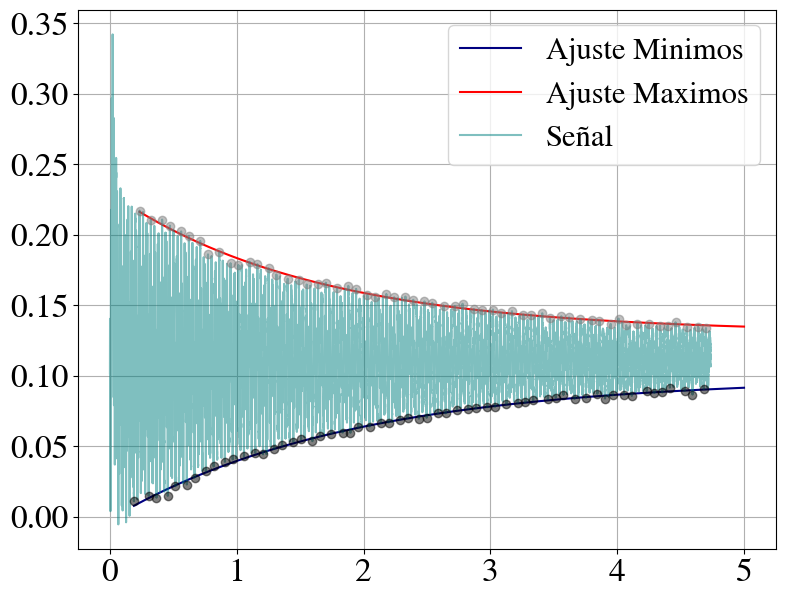

-0.609309721990829


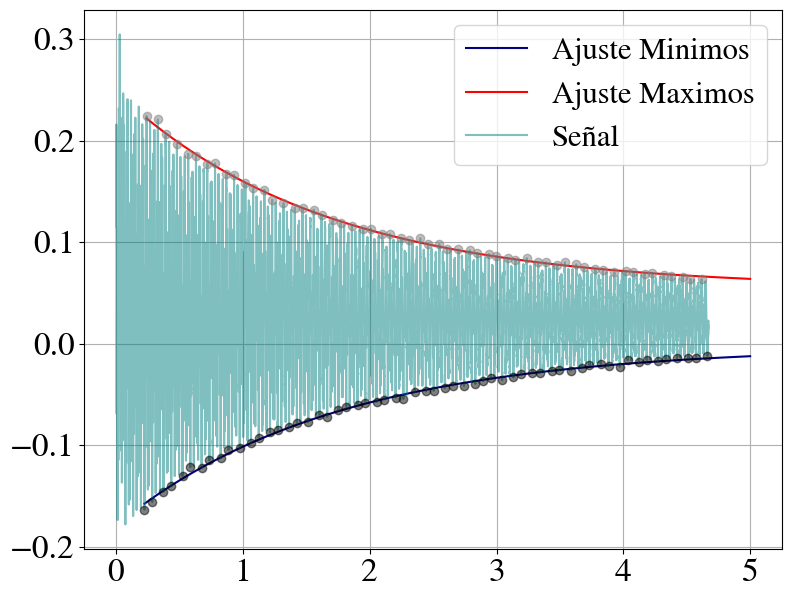

-0.6727260176040119


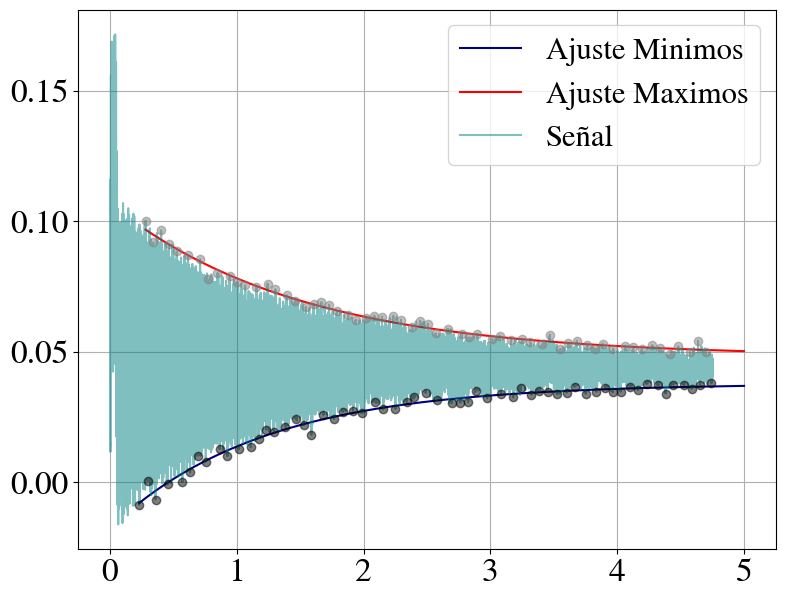

-0.46633325653243124


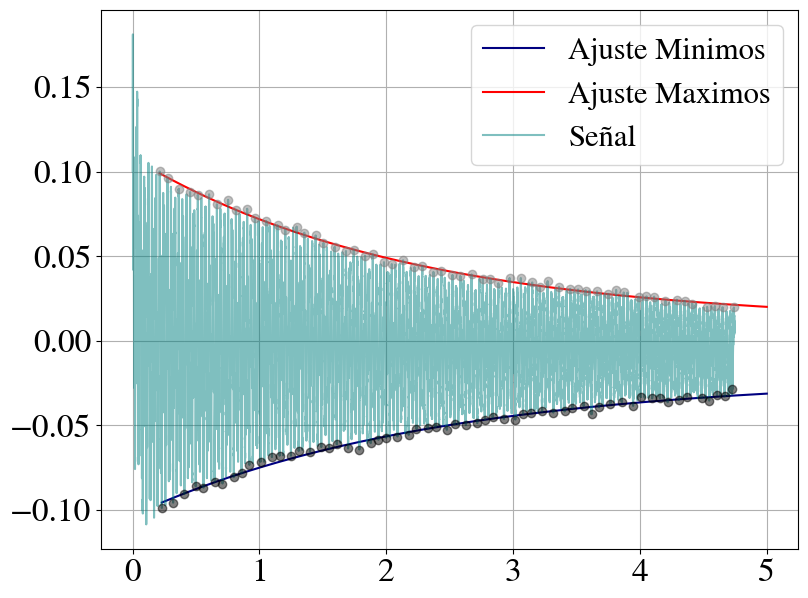

-0.5232357726149703


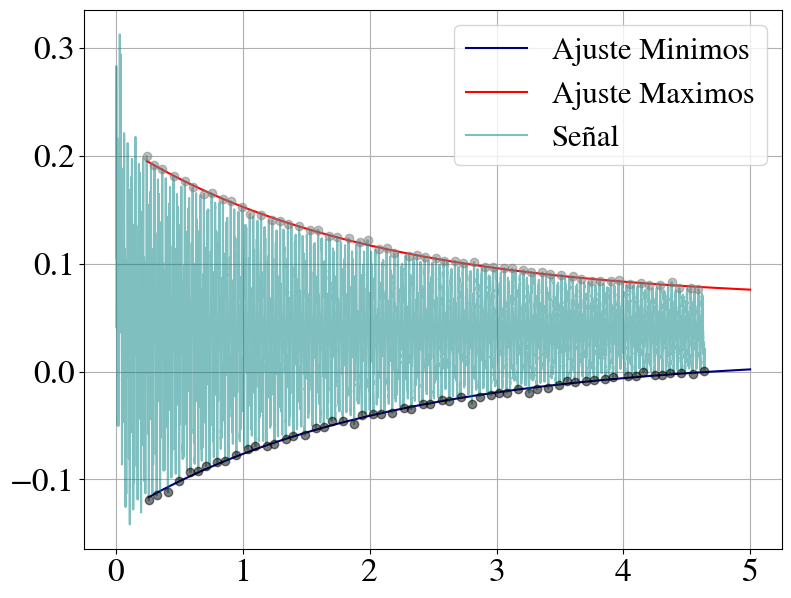

In [38]:
maximos = []
minimos = []
t_maximos = []
t_minimos = []

coef_min = []
ampl_min = []
t_ini_min = []
ordenada_min = []


coef_max = []
ampl_max = []
t_ini_max = []
ordenada_max = []

err_coef_max = []
err_coef_min = []

for i in range(5):

    #maximos
    picos_voltaje, diccionario_voltaje = find_peaks(voltaje[i], height = 0, distance = 600)

    peak_voltage_values = voltaje[i].iloc[picos_voltaje[3:]]
    t_max = tiempo[i].iloc[picos_voltaje[3:]]

    maximos.append(peak_voltage_values)
    suave_max = np.linspace(t_max.iloc[0], 5, 5000)


    #minimos
    picos_voltaje_min, diccionario_voltaje_min = find_peaks(-voltaje[i], height = -0.1, distance = 600)

    min_volt = voltaje[i].iloc[picos_voltaje_min[3:]]
    t_min = tiempo[i].iloc[picos_voltaje_min[3:]]

    minimos.append(min_volt)
    suave_min = np.linspace(t_min.iloc[0], 5, 5000)

    #ajustes

    if i ==0:
        p_ini_max = [0.2, -1, t_max.iloc[0], 0]
        p_ini_min = [min(min_volt), 1, t_min.iloc[0], 0]

    elif i ==3:
        p_ini_max = [max(peak_voltage_values), -1, t_max.iloc[0], 0]
        p_ini_min = [-0.11, 1, t_min.iloc[0], 0]

    else:
        p_ini_max = [max(peak_voltage_values), -1, t_max.iloc[0], 0]
        p_ini_min = [min(min_volt), 1, t_min.iloc[0], 0]

    popt, pcov = curve_fit(exponencial, t_max, peak_voltage_values,  p0 = p_ini_max)
    amplitud, decaimiento, t0, offset = popt
    amplitud_err, decaimiento_err, t0_err, offset_err = np.sqrt(np.diag(pcov))

    print(decaimiento)

    popt_min, pcov_min = curve_fit(exp_neg, t_min, min_volt, p0 = p_ini_min)
    amplitud_min, decaimiento_min, t0_min, offset_min = popt_min
    amplitud_min_err, decaimiento_min_err, t0_min_err, offset_min_err = np.sqrt(np.diag(pcov_min))

    #ploteo
    plt.plot(suave_min, exp_neg(suave_min,amplitud_min, decaimiento_min, t0_min, offset_min), label = 'Ajuste Minimos', color = 'navy')
    plt.plot(suave_max, exponencial(suave_max,amplitud, decaimiento, t0, offset), label = 'Ajuste Maximos', color = 'red')
    plt.plot(tiempo[i], voltaje[i], label = 'Señal', color = 'teal', alpha = 0.5)
    plt.plot(t_min,min_volt, marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
    plt.plot(t_max,peak_voltage_values, marker = 'o', linestyle = '', color = 'gray', alpha = 0.5)
    plt.legend()
    plt.show()


    #appendeo los parámetros
    coef_min.append(decaimiento_min)
    ampl_min.append(amplitud_min)
    err_coef_min.append(decaimiento_min_err)
    t_ini_min.append(t0_min)
    ordenada_min.append(offset_min)
    t_minimos.append(t_min)

    coef_max.append(decaimiento)
    ampl_max.append(amplitud)
    err_coef_max.append(decaimiento_err)
    t_ini_max.append(t0)
    ordenada_max.append(offset)
    t_maximos.append(t_max)


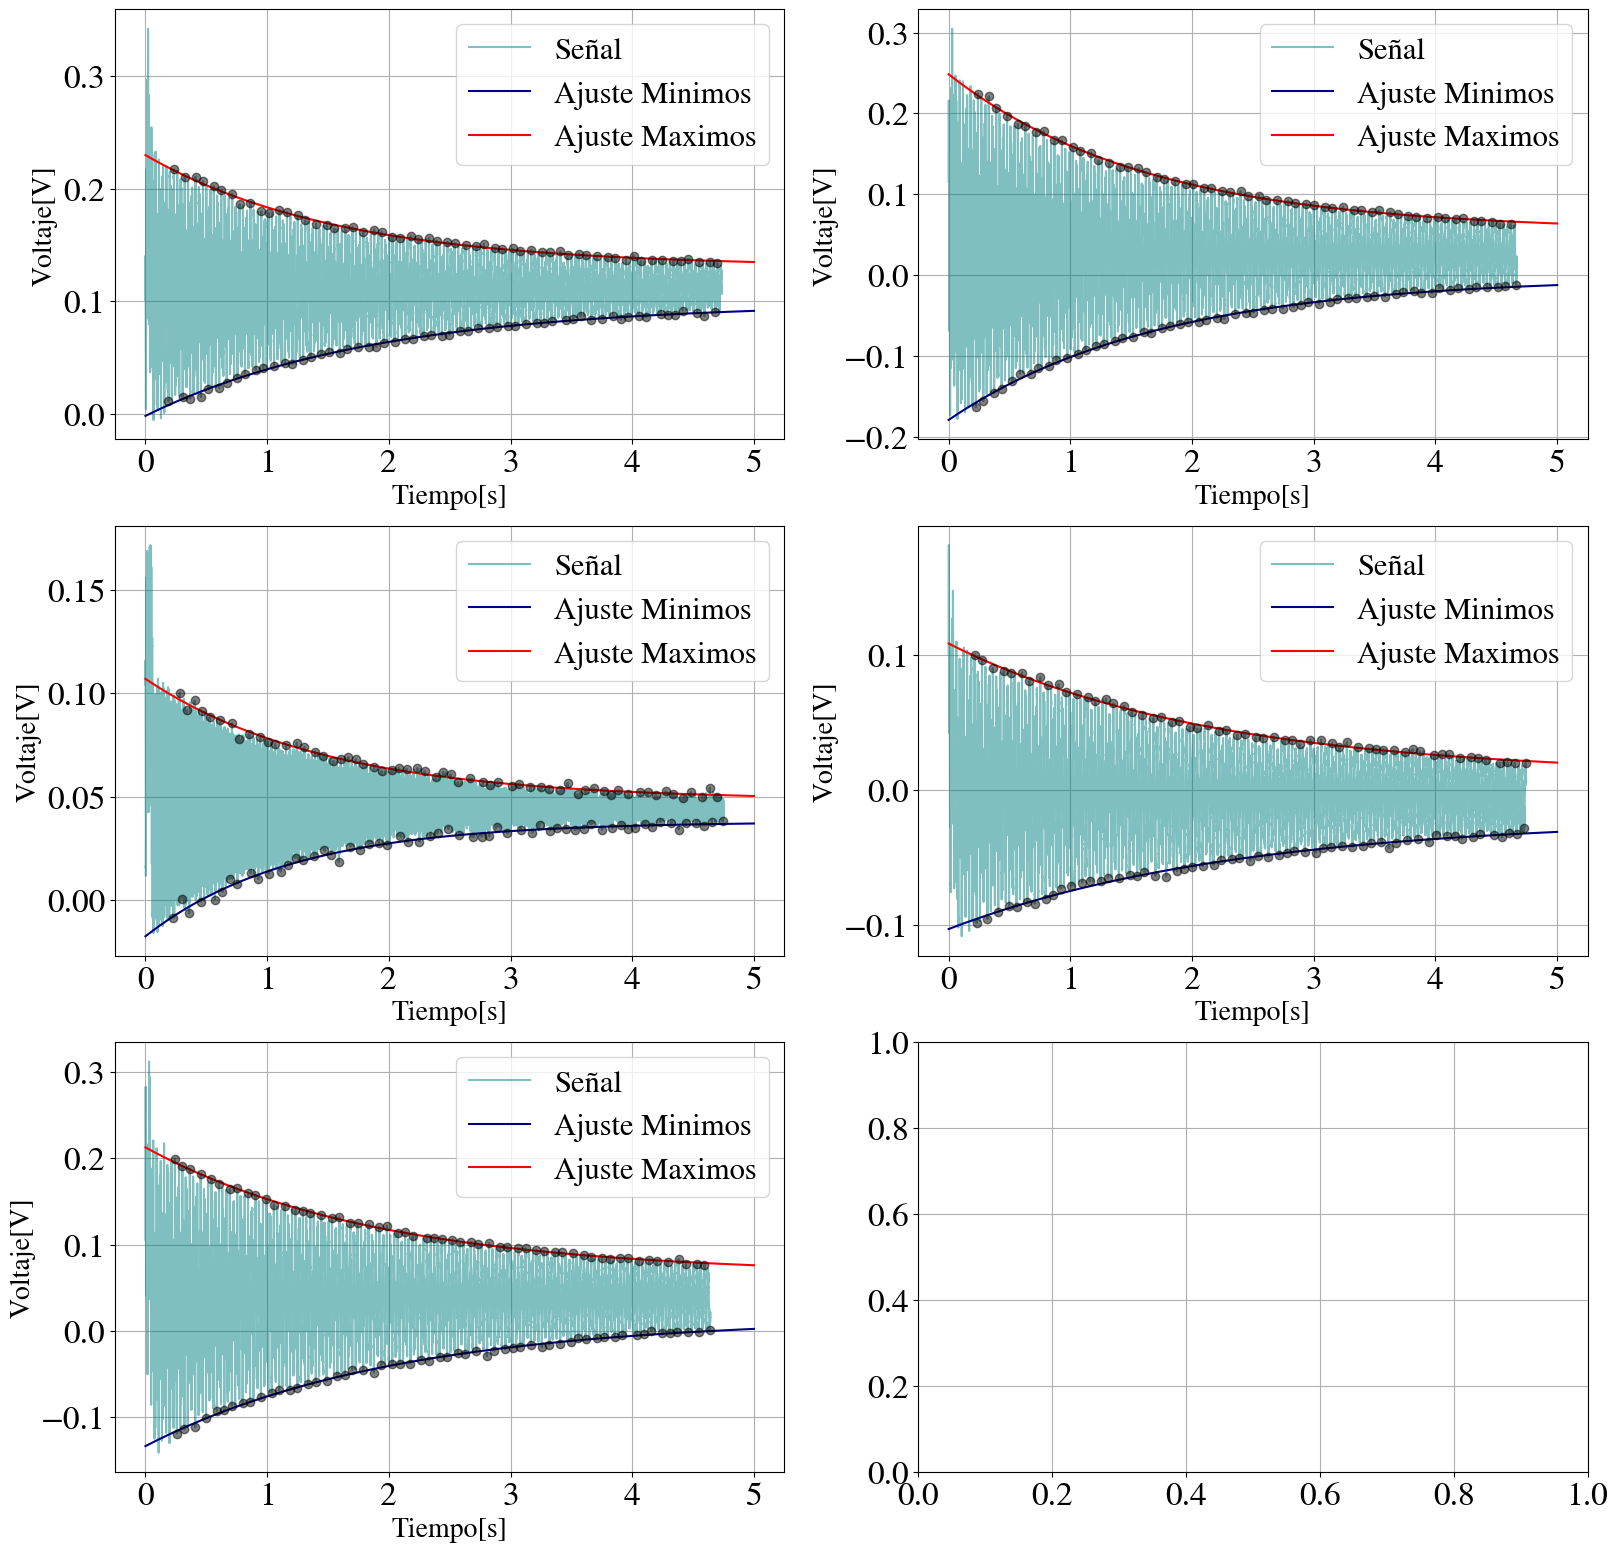

In [45]:
#Grafico todo junto
suave = np.linspace(0,5,1000)

fig, axs = plt.subplots(3,2, figsize= (19,19))
axs[0,0].plot(tiempo[0], voltaje[0], color = 'teal', label = 'Señal', alpha = 0.5)
axs[0,0].plot(suave, exp_neg(suave,ampl_min[0], coef_min[0], t_ini_min[0], ordenada_min[0]), label = 'Ajuste Minimos', color = 'navy')
axs[0,0].plot(suave, exponencial(suave,ampl_max[0], coef_max[0], t_ini_max[0], ordenada_max[0]), label = 'Ajuste Maximos', color = 'red')
axs[0,0].plot(t_minimos[0], minimos[0], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,0].plot(t_maximos[0], maximos[0], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].legend()


axs[0,1].plot(tiempo[1], voltaje[1], color = 'teal', label = 'Señal', alpha = 0.5)
axs[0,1].plot(suave, exp_neg(suave,ampl_min[1], coef_min[1], t_ini_min[1], ordenada_min[1]), label = 'Ajuste Minimos', color = 'navy')
axs[0,1].plot(suave, exponencial(suave,ampl_max[1], coef_max[1], t_ini_max[1], ordenada_max[1]), label = 'Ajuste Maximos', color = 'red')
axs[0,1].plot(t_minimos[1], minimos[1], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,1].plot(t_maximos[1], maximos[1], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
axs[0,1].legend()

axs[1,0].plot(tiempo[2], voltaje[2], color = 'teal', label = 'Señal', alpha = 0.5)
axs[1,0].plot(suave, exp_neg(suave,ampl_min[2], coef_min[2], t_ini_min[2], ordenada_min[2]), label = 'Ajuste Minimos', color = 'navy')
axs[1,0].plot(suave, exponencial(suave,ampl_max[2], coef_max[2], t_ini_max[2], ordenada_max[2]), label = 'Ajuste Maximos', color = 'red')
axs[1,0].plot(t_minimos[2], minimos[2], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,0].plot(t_maximos[2], maximos[2], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
axs[1,0].legend()

axs[1,1].plot(tiempo[3], voltaje[3], color = 'teal', label = 'Señal', alpha = 0.5)
axs[1,1].plot(suave, exp_neg(suave,ampl_min[3], coef_min[3], t_ini_min[3], ordenada_min[3]), label = 'Ajuste Minimos', color = 'navy')
axs[1,1].plot(suave, exponencial(suave,ampl_max[3], coef_max[3], t_ini_max[3], ordenada_max[3]), label = 'Ajuste Maximos', color = 'red')
axs[1,1].plot(t_minimos[3], minimos[3], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,1].plot(t_maximos[3], maximos[3], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
axs[1,1].legend()

axs[2,0].plot(tiempo[4], voltaje[4], color = 'teal', label = 'Señal', alpha = 0.5)
axs[2,0].plot(suave, exp_neg(suave,ampl_min[4], coef_min[4], t_ini_min[4], ordenada_min[4]), label = 'Ajuste Minimos', color = 'navy')
axs[2,0].plot(suave, exponencial(suave,ampl_max[4], coef_max[4], t_ini_max[4], ordenada_max[4]), label = 'Ajuste Maximos', color = 'red')
axs[2,0].plot(t_minimos[4], minimos[4], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[2,0].plot(t_maximos[4], maximos[4], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Tiempo[s]')
axs[2,0].legend()

plt.show()

In [ ]:
print(coef_max)

#Calculo del módulo de Young

In [18]:
alfa_max = np.array([-0.63010068, -0.60930972, -0.67272602, -0.46633326, -0.52323577])
err_alfa_max = np.array([0.02396529, 0.01372817, 0.03431408, 0.01961458, 0.01338228])
alfa_min = np.array([-0.5323717 , -0.58016414, -0.83399743, -0.42262247, -0.49077199])
err_alfa_min = np.array([0.01755521, 0.01432339, 0.04499874, 0.02664975 , 0.01718384])


frecuencias_fundamental = np.array([31.6, 31.2, 31.6, 31.6, 31])
error_frec = np.array([1/5]*5)


In [46]:
def dens_lineal(d, rho):
    return rho*np.pi*(d/2)**2
def momento(d):
    return np.pi*(d**4)/64

k1_L = 1.875104
k2_L = 4.694091
k3_L = 7.854757
k4_L = 10.995541

#defino variables con los datos


rho_cobre = 8960
L_cobre = 243*10**(-3)
error_L_cobre = 1*10**(-3)
d_cobre = 5*10**(-3)
error_d_cobre = 0.05*10**(-3)
f1_teorico = 45

def modulo_young(f, I, rho, k, alfa, L):
    E = ((f*2*np.pi)**2 + alfa**2)*((rho*(L**4))/(I*(k**4)))
    return E

E_teorico = modulo_young(f1_teorico, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,decaimiento, L_cobre)


E_max = []
E_min = []

for k in range(len(frecuencias_fundamental)):
    E_max_k = modulo_young(frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_max[k], L_cobre)
    E_min_k = modulo_young(frecuencias_fundamental[k], momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,alfa_min[k], L_cobre)
    E_max.append(E_max_k)
    E_min.append(E_min_k)

E_max = np.array(E_max)
E_min = np.array(E_min)


print(type(E_max), type(E_min))
print(f'el valor esperado es {E_teorico*10**(-9):.2f}GPa y los obtenidos {E_max*10**(-9)}GPa para los máximos y {E_min*10**(-9)}GPa para los mínimos ')


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
el valor esperado es 129.30GPa y los obtenidos [63.76023555 62.1562432  63.76032537 63.75994514 61.36177238]GPa para los máximos y [63.76005181 62.15618713 63.76071838 63.75988229 61.36171914]GPa para los mínimos 


In [20]:
E = np.concatenate((E_max, E_min))


#probando cosas

## Probando ver similitudes

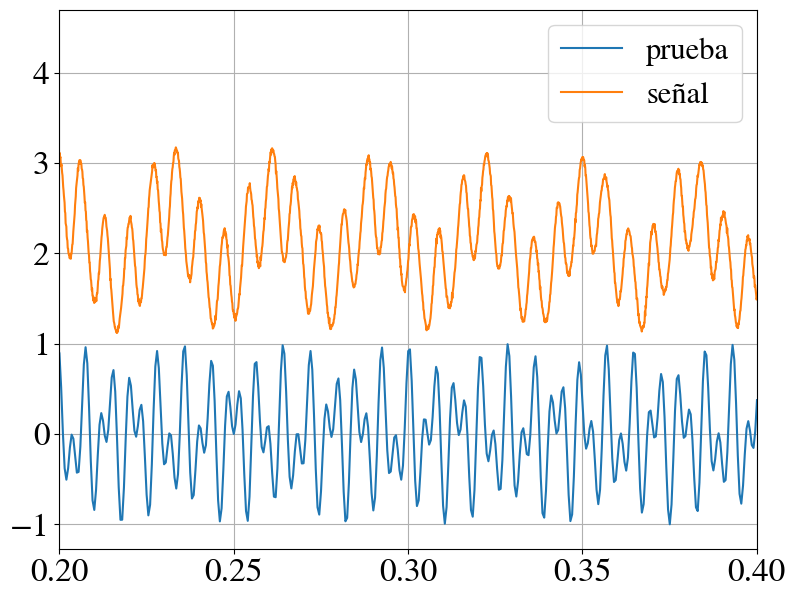

In [67]:
x = np.linspace(0,5, 10000)

f = np.sin(54*2*np.pi*x)*np.sin(194*2*np.pi*x) #+ np.sin(32*2*np.pi*x)
f_2 = np.sin(54*2*np.pi*x)+np.sin(194*2*np.pi*x)

plt.plot(x,f, label = 'prueba')
#plt.plot(x, f_2, label = 'prueba suma')
plt.plot(tiempo[0], voltaje[0]*10+1, label = 'señal')
plt.legend()
plt.xlim(0.2,0.4)
plt.show()

##probando para ajustar bonito

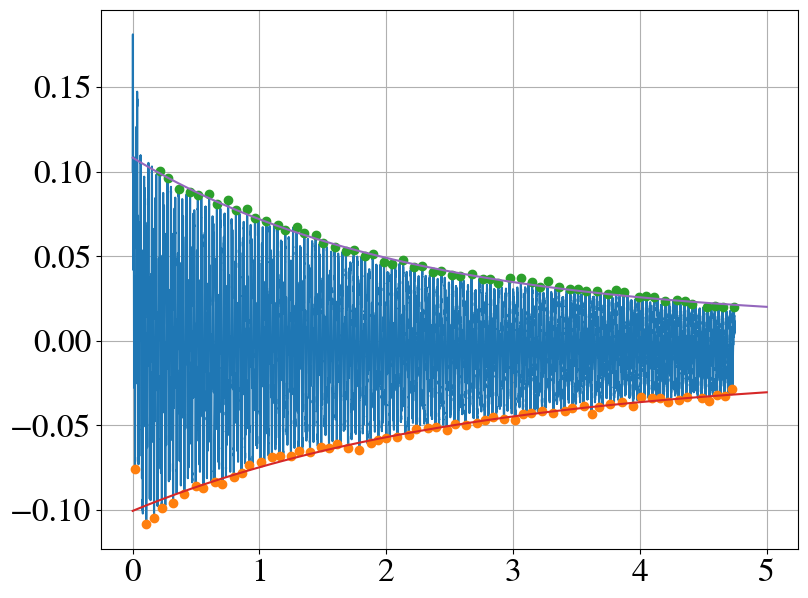

[ 0.76090714 -0.46633326 -4.40148617  0.01055823]


In [22]:
p, d = find_peaks(-voltaje[3], height = -0.1, distance = 600)
p_max, d_max = find_peaks(voltaje[3], height = 0, distance = 600)

suave = np.linspace(0,5,2000)

p_0 = [-0.11, 1, tiempo[3].iloc[p[0]], 0] #min(voltaje[3].iloc[p])
p_0_max = [0.2, -1, tiempo[3].iloc[p_max[3]], 0] #max(voltaje[3].iloc[p_max[3:]])


param, err = curve_fit(exp_neg, tiempo[3].iloc[p], voltaje[3].iloc[p], p0 = p_0)
param_max, err_max = curve_fit(exponencial, tiempo[3].iloc[p_max[3:]], voltaje[3].iloc[p_max[3:]], p0 = p_0_max)



plt.plot(tiempo[3], voltaje[3])
plt.plot(tiempo[3].iloc[p], voltaje[3].iloc[p], marker = 'o', linestyle = '')
plt.plot(tiempo[3].iloc[p_max[3:]], voltaje[3].iloc[p_max[3:]], marker = 'o', linestyle = '')
plt.plot(suave, exp_neg(suave, *param))
plt.plot(suave, exponencial(suave, *param_max))
plt.show()

print(param_max)

In [23]:
print(ampl_min)
print(coef_min)

[np.float64(0.0538785483136643), np.float64(0.2857103729809381), np.float64(0.025018511893368893), np.float64(0.08425310267428227), np.float64(0.1579761332611233)]
[np.float64(0.53237169798524), np.float64(0.5801641438586389), np.float64(0.8339974341840058), np.float64(0.4226224712930973), np.float64(0.49077199029681046)]
